**Q1: Lag correlations of weather time series**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

hourdata=np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/AllHourly.txt')[[6,28],2:]
dc = hourdata[0,:]
jb=hourdata[1,:]
DC = dc[~np.isnan(dc)]



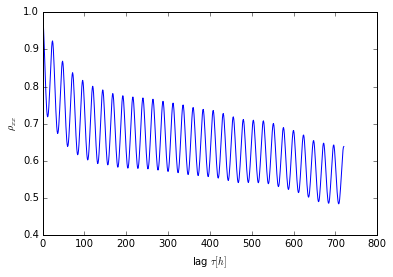

In [2]:
lag = 30*24
dcnorm = dc[~np.isnan(dc)] - np.mean(dc[~np.isnan(dc)])

cxx = np.zeros(lag+1)
rho = np.zeros(lag+1)
lags = range(lag+1)

for tau in range(lag+1):
    if tau!=0:
        dc1 = dcnorm[:-tau:]
    else:
        dc1 = dcnorm
    #dc1 = dc1[~np.isnan(dc1)]
   
    dc2 = dcnorm[tau::]
    #dc2 = dc2[~np.isnan(dc2)]
    
    #print len(dc1), len(dc2)
    cxx[tau] = np.mean(dc1*dc2)
    rho[tau] = cxx[tau]/(np.std(dc1)*np.std(dc2))
    #print cxx[tau]

fig,ax = plt.subplots(1,1)

ax.plot(lags, rho)
ax.set_xlabel(r"lag $\tau [h]$")
ax.set_ylabel(r"$\rho_{xx}$")



When $\tau = 0$, the correlation is 1. There are two main trends happending as $\tau$ increases. When the day night cycles are out of phase (at $\tau = 12+24n, n=0,1,2,3...$) the correlation drops to a local minimum. When the day night cycles are in phase (at $\tau = 24n, n=0,1,2,3...$) the correlation is at the local maximum. The general trend as $\tau$ increases, is that the correlation slowly drops. This is as the days being compared become father apart, the difference in average temperatures increases.

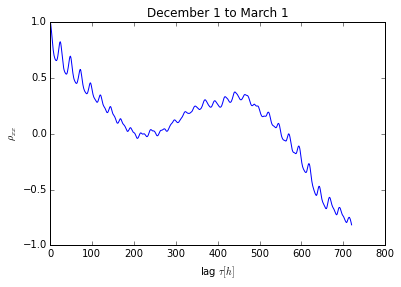

In [3]:

winter = dc[(335)*24:(425)*24:] #December 1 to March 1
wintnorm = winter[~np.isnan(winter)] - np.mean(winter[~np.isnan(winter)])

lag = 30*24

cxx = np.zeros(lag+1)
rho = np.zeros(lag+1)
lags = range(lag+1)
for tau in range(lag+1):
    if tau!=0:
        wint1 = wintnorm[:-tau:]
    else:
        wint1 = wintnorm
   
    wint2 = wintnorm[tau::]
    
    cxx[tau] = np.mean(wint1*wint2)
    rho[tau] = cxx[tau]/(np.std(wint1)*np.std(wint2))
    
fig,ax = plt.subplots(1,1)

ax.plot(lags, rho)
ax.set_xlabel(r"lag $\tau [h]$")
ax.set_ylabel(r"$\rho_{xx}$")
ax.set_title('December 1 to March 1')


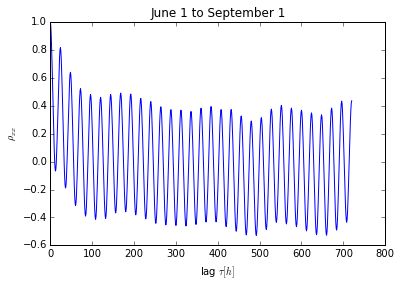

In [4]:
summer = dc[(152)*24:(244)*24:] #June 1 to Septmber 1
sumnorm = summer[~np.isnan(summer)] - np.mean(summer[~np.isnan(summer)])

lag = 30*24

cxx = np.zeros(lag+1)
rho = np.zeros(lag+1)
lags = range(lag+1)
for tau in range(lag+1):
    if tau!=0:
        sum1 = sumnorm[:-tau:]
    else:
        sum1 = sumnorm
   
    sum2 = sumnorm[tau::]
    
    cxx[tau] = np.mean(sum1*sum2)
    rho[tau] = cxx[tau]/(np.std(sum1)*np.std(sum2))
    
fig,ax = plt.subplots(1,1)

ax.plot(lags, rho)
ax.set_xlabel(r"lag $\tau [h]$")
ax.set_ylabel(r"$\rho_{xx}$")
ax.set_title('June 1 to September 1')


When comparring the differences between the summer and winter data, it is clear that there is more variation in the correlation durring the summer than during the winter. The main reason for this is most likely because the change in teperature from day to night is greater during the summer than it is during the winter. So when the day night cycle is out of phase, the drop in corrlation is greater during the summer than in the winter.

**Q2: Emperically show that the expected value of a finite spectrum approaches the true spectrum as T goes to infinity.**

$$
R_{xx} = E[x(t)x(t+\tau)]
$$
$$
E[x(t)] = \int_{-\infty}^{\infty}x(t)
$$
$$
x(t) = \int_{t-b}^{t}y(t)dt
$$
$$
x(t+\tau) = \int_{t+\tau-b}^{t+\tau}y(t+\tau)d\tau
$$
$$
R_{xx} = E\bigg[\int_{t-b}^{t}y(t)dt \int_{t+\tau-b}^{t+\tau}y(t+\tau)d\tau\bigg] = E\bigg[\int_{t-b}^{t}\int_{t+\tau-b}^{t+\tau}y(t)y(t+\tau)d\tau dt\bigg] = \int_{t-b}^{t}\int_{t+\tau-b}^{t+\tau}E[y(t)y(t+\tau)]d\tau dt
$$
$$
= \int_{t-b}^{t}\int_{t+\tau-b}^{t+\tau} \delta (\tau) d\tau dt = \int_{t-b}^{t}dt
$$


/Users/matthew/Dropbox/Assignments/PHYS411/venv/lib/python2.7/site-packages/ipykernel/__main__.py:13: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/matthew/Dropbox/Assignments/PHYS411/venv/lib/python2.7/site-packages/ipykernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


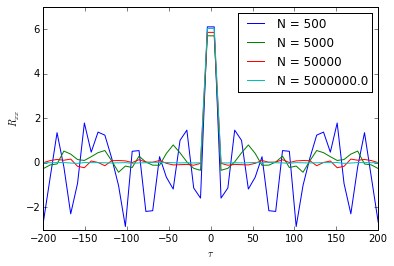

In [65]:
N = 500

tau = np.linspace(-200,200)
def getRxx(N,tau):
    y = np.random.randn(N)
    b = 10.
    x = np.convolve(y,np.ones(b))
    
    rxx = np.zeros(len(tau),dtype=float)
    
    for ind,t in enumerate(tau):
        if t!=0:
            rxx[ind] = np.mean(x[:-np.abs(t):]*x[np.abs(t)::])
        else:
            rxx[ind] = np.mean(x**2)

    ax.plot(tau,rxx,label='N = {}'.format(N))

fig,ax = plt.subplots(1,1)
for N in [500, 5000,50000,5e6]:
    getRxx(N,tau)
ax.legend()
ax.set_xlabel(r'$\tau$')
ax.set_ylabel('$R_{xx}$')
        

$$
S_{xx}(f) = \int_{-\infty}^{\infty}R_{xx}(\tau)e^{-j2\pi f\tau}d\tau
$$

$$
S_{xx} = \int_{}^{}(b-|\tau|)e^{-j2\pi f\tau}d\tau
$$

$$
= \frac{-1}{(2\pi f)^2}\big[ (2je^{2j\pi fb}\pi fb - e^{2j\pi fb} + 1) e^{-2j\pi fb} + e^{2j\pi fb} -2j\pi fb -1 \big]
$$

$$
\frac{-1}{(2\pi f)^2}\big[ 2j\pi fb - 1 + e^{-2j\pi fb} +e^{2j\pi fb} - 2j\pi fb -1\big] = \frac{1}{(2\pi f)^2} \big[ 2(1 - \frac{e^{-2j\pi fb} +e^{2j\pi fb}}{2} \big]
$$

$$
= \frac{(1 - cos(2\pi fb))}{2(\pi f)^2} = \frac{sin^2(\pi fb)}{\pi^2 f^2}
$$

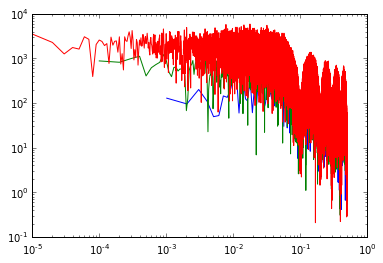

In [81]:
def calcFT(N,freq):
    y = np.random.randn(N)
    b = 10.
    x = np.convolve(y,np.ones(b),mode='valid')
    
    f = np.linspace(0,freq,len(x))
    t = np.arange(0,len(x))
    ft = np.zeros(len(x),dtype=float)
    
    for ind,xx in enumerate(x):
        ft[ind] = np.abs(np.sum(x*np.exp(-2j*np.pi*f[ind]*t)))
    plt.loglog(f,ft)

for N in [500, 5000, 50000]:   
    calcFT(N,0.5)

In [ ]:
def calcFT2(x,freq):
    f = np.linspace(0,freq,len(x))
    t = np.arange(0,len(x))
    ft = np.zeros(len(x),dtype=float)
    
    for ind,xx in enumerate(x):
        ft[ind] = np.abs(np.sum(x*np.exp(-2j*np.pi*f[ind]*t)))
    plt.loglog(f,ft)
    return ft

def avg(x,N,NN,freq):
    xsec = split(x,NN)
    ftavg = np.ndarray(shape=(NN, len(xsec[0])))
    f = np.linspace(0,freq, len(xsec[0]))
    
    for i in range(NN):
        
        ftavg[i] = calcFT2(xx, freq)
        
    ft = np.mean(ftavg, axis=0)/NN
    
    plt.loglog(f,ft)
    
def split(a, n):
    secs = len(a)/n
    return [a[i:i+secs] for i in range(0,len(a), secs)]

xx = np.convolve(np.random.randn(50000),np.ones(b),mode="valid")
for NN in [1,5,50,100]:
    avg(xx,50000,NN,0.5)